In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
raw_data = pd.read_csv("Zoo.csv")
raw_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
raw_data.describe()

In [5]:
raw_data.duplicated().sum()

0

In [7]:
raw_data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [8]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


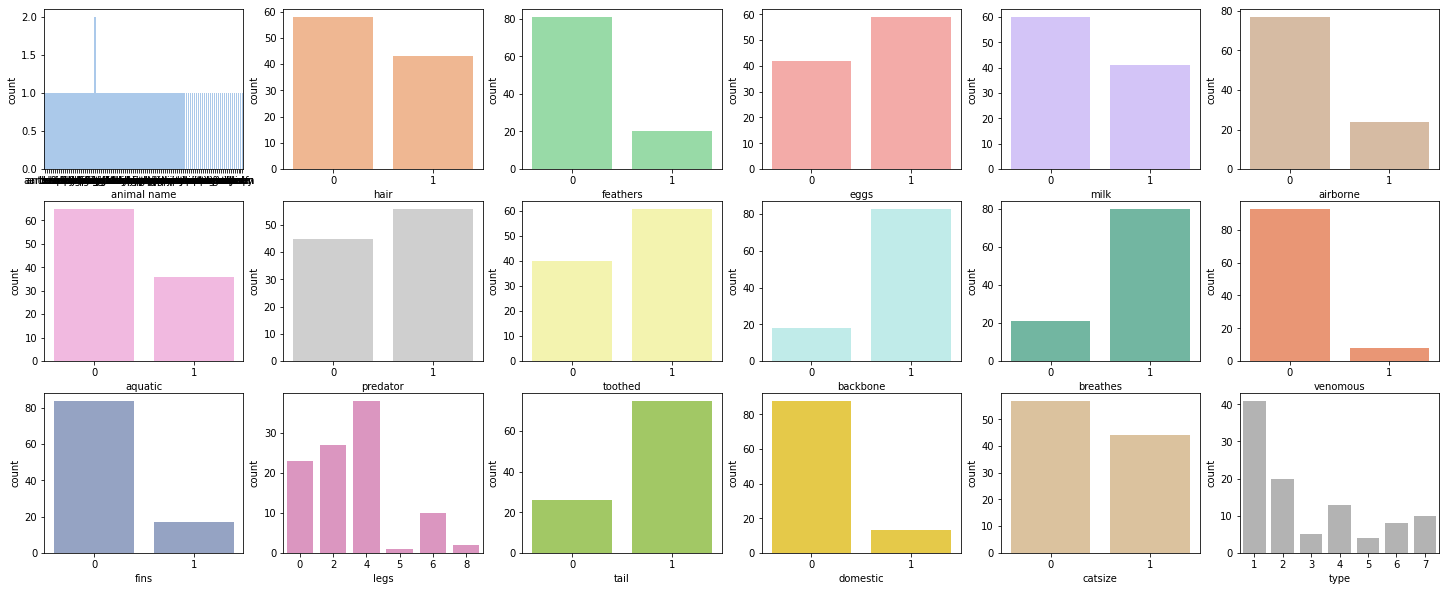

In [18]:
color_palette = sns.color_palette("pastel") + sns.color_palette("Set2") + sns.color_palette("husl", 25)
fig, axes = plt.subplots(3, 6,figsize=(25,10))
axe = axes.flatten()

for i,feature in enumerate(raw_data.columns):
     sns.countplot(data=raw_data, x=feature, ax=axe[i], color=color_palette[i])  
plt.show()

In [40]:
data = raw_data.copy()

In [41]:
data = data.drop(['animal name'], axis=1)
data.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [42]:
X = data.drop('type',axis=1)
Y = data[['type']]

In [43]:
X.shape, X.columns, Y.shape, Y.columns

((101, 16),
 Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
        'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
        'domestic', 'catsize'],
       dtype='object'),
 (101, 1),
 Index(['type'], dtype='object'))

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((70, 16), (31, 16), (70, 1), (31, 1))

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_clf_1 = KNeighborsClassifier(n_neighbors=5)
knn_clf_1.fit(X_train, Y_train)
Y_pred_1 = knn_clf_1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_1)*100)
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy: 93.54838709677419
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.81      0.86      0.83        31
weighted avg       0.89      0.94      0.91        31



In [55]:
from sklearn.model_selection import GridSearchCV

knn_clf_2 = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  

grid_2 = GridSearchCV(knn_clf_2, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_2=grid_2.fit(X_train, Y_train)

print(grid_search_2.best_params_)
accuracy = grid_search_2.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 94.29%


In [56]:
knn_clf_3 = KNeighborsClassifier(n_neighbors=1)
knn_clf_3.fit(X_train, Y_train)
Y_pred_3 = knn_clf_3.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_3)*100)
print(confusion_matrix(Y_test, Y_pred_3))
print(classification_report(Y_test, Y_pred_3))

Accuracy: 96.7741935483871
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31

